# NordPool Data Analysis

**Introduction**

This is an analysis of hourly electricity spot price data in the Nordics (excl. Iceland) and the Baltics. The data is freely available on https://www.nordpoolgroup.com/historical-market-data/.

NordPool was established in 1993 by the Norwegian TSO Statnett after the Norwegian parliament decided to deregulate the electricity market in 1991. This was the first deregulated market in the world, and NordPool expanded in 1996 to also cover the Swedish market. In 1998 Finland joined, and in 2000 Denmark also became part of the join electricity trade market. 


This analysis is created by Rasmus Vester Thøgersen and made available on GitHub through the MIT License. Link to the GitHub-repository: https://github.com/rasmusthog/nordpool-data-analysis

# 1. Importing data and EDA

Let's start importing the data and doing some exploratory data analysis (EDA). 

The data has been cleaned using a seperate script called "import_data.py", available at the GitHub repository. This imports the hourly elspot price files in .CSV-format (manually exported from .XLS due to some import errors), cleans the data and concatenates the files into a single .CSV-file containing data from 2014-2018.

count    39839.000000
mean        28.305711
std          9.116175
min          1.140000
25%         23.710000
50%         27.980000
75%         32.230000
max        199.970000
Name: SYS, dtype: float64


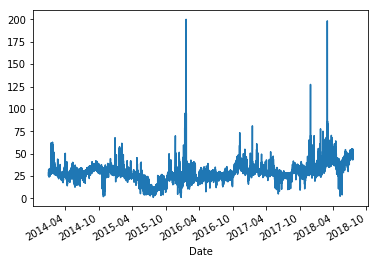

In [2]:
# importing modules
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# importing full dataset

elspot_df = pd.read_csv("datasets/total-elspot-prices_2014-2018.csv", delimiter=",", header=0, index_col="Date", parse_dates=True)

# Look at the description and visual plot of the system price.
print(elspot_df["SYS"].describe())
elspot_df["SYS"].plot()


The graph shows two very large peaks, as well as one slightly smaller. Turns out that the two large peaks occured on 21st January 2016 (at 08:00 and 18:00) and 1st March 2018 (at 08:00). These peak correspond to about 7 times the mean elspot price. Not sure if these are valid data points or not, but I have contacted NordPool to ask them about this.

# 2. Investigating differences in countries

The areas are divided into different price regions: 

- Norway: Oslo, Kristiansand, Bergen, Molde, Trondheim, Tromsø
- Sweden: SE1, SE2, SE3, SE4
- Denmark: DK1, DK2
- Finland: FI
- Latvia: LV
- Lithuania: LT
- Estonia: EE

Let's investigate the evolution of the prices in the different countries.

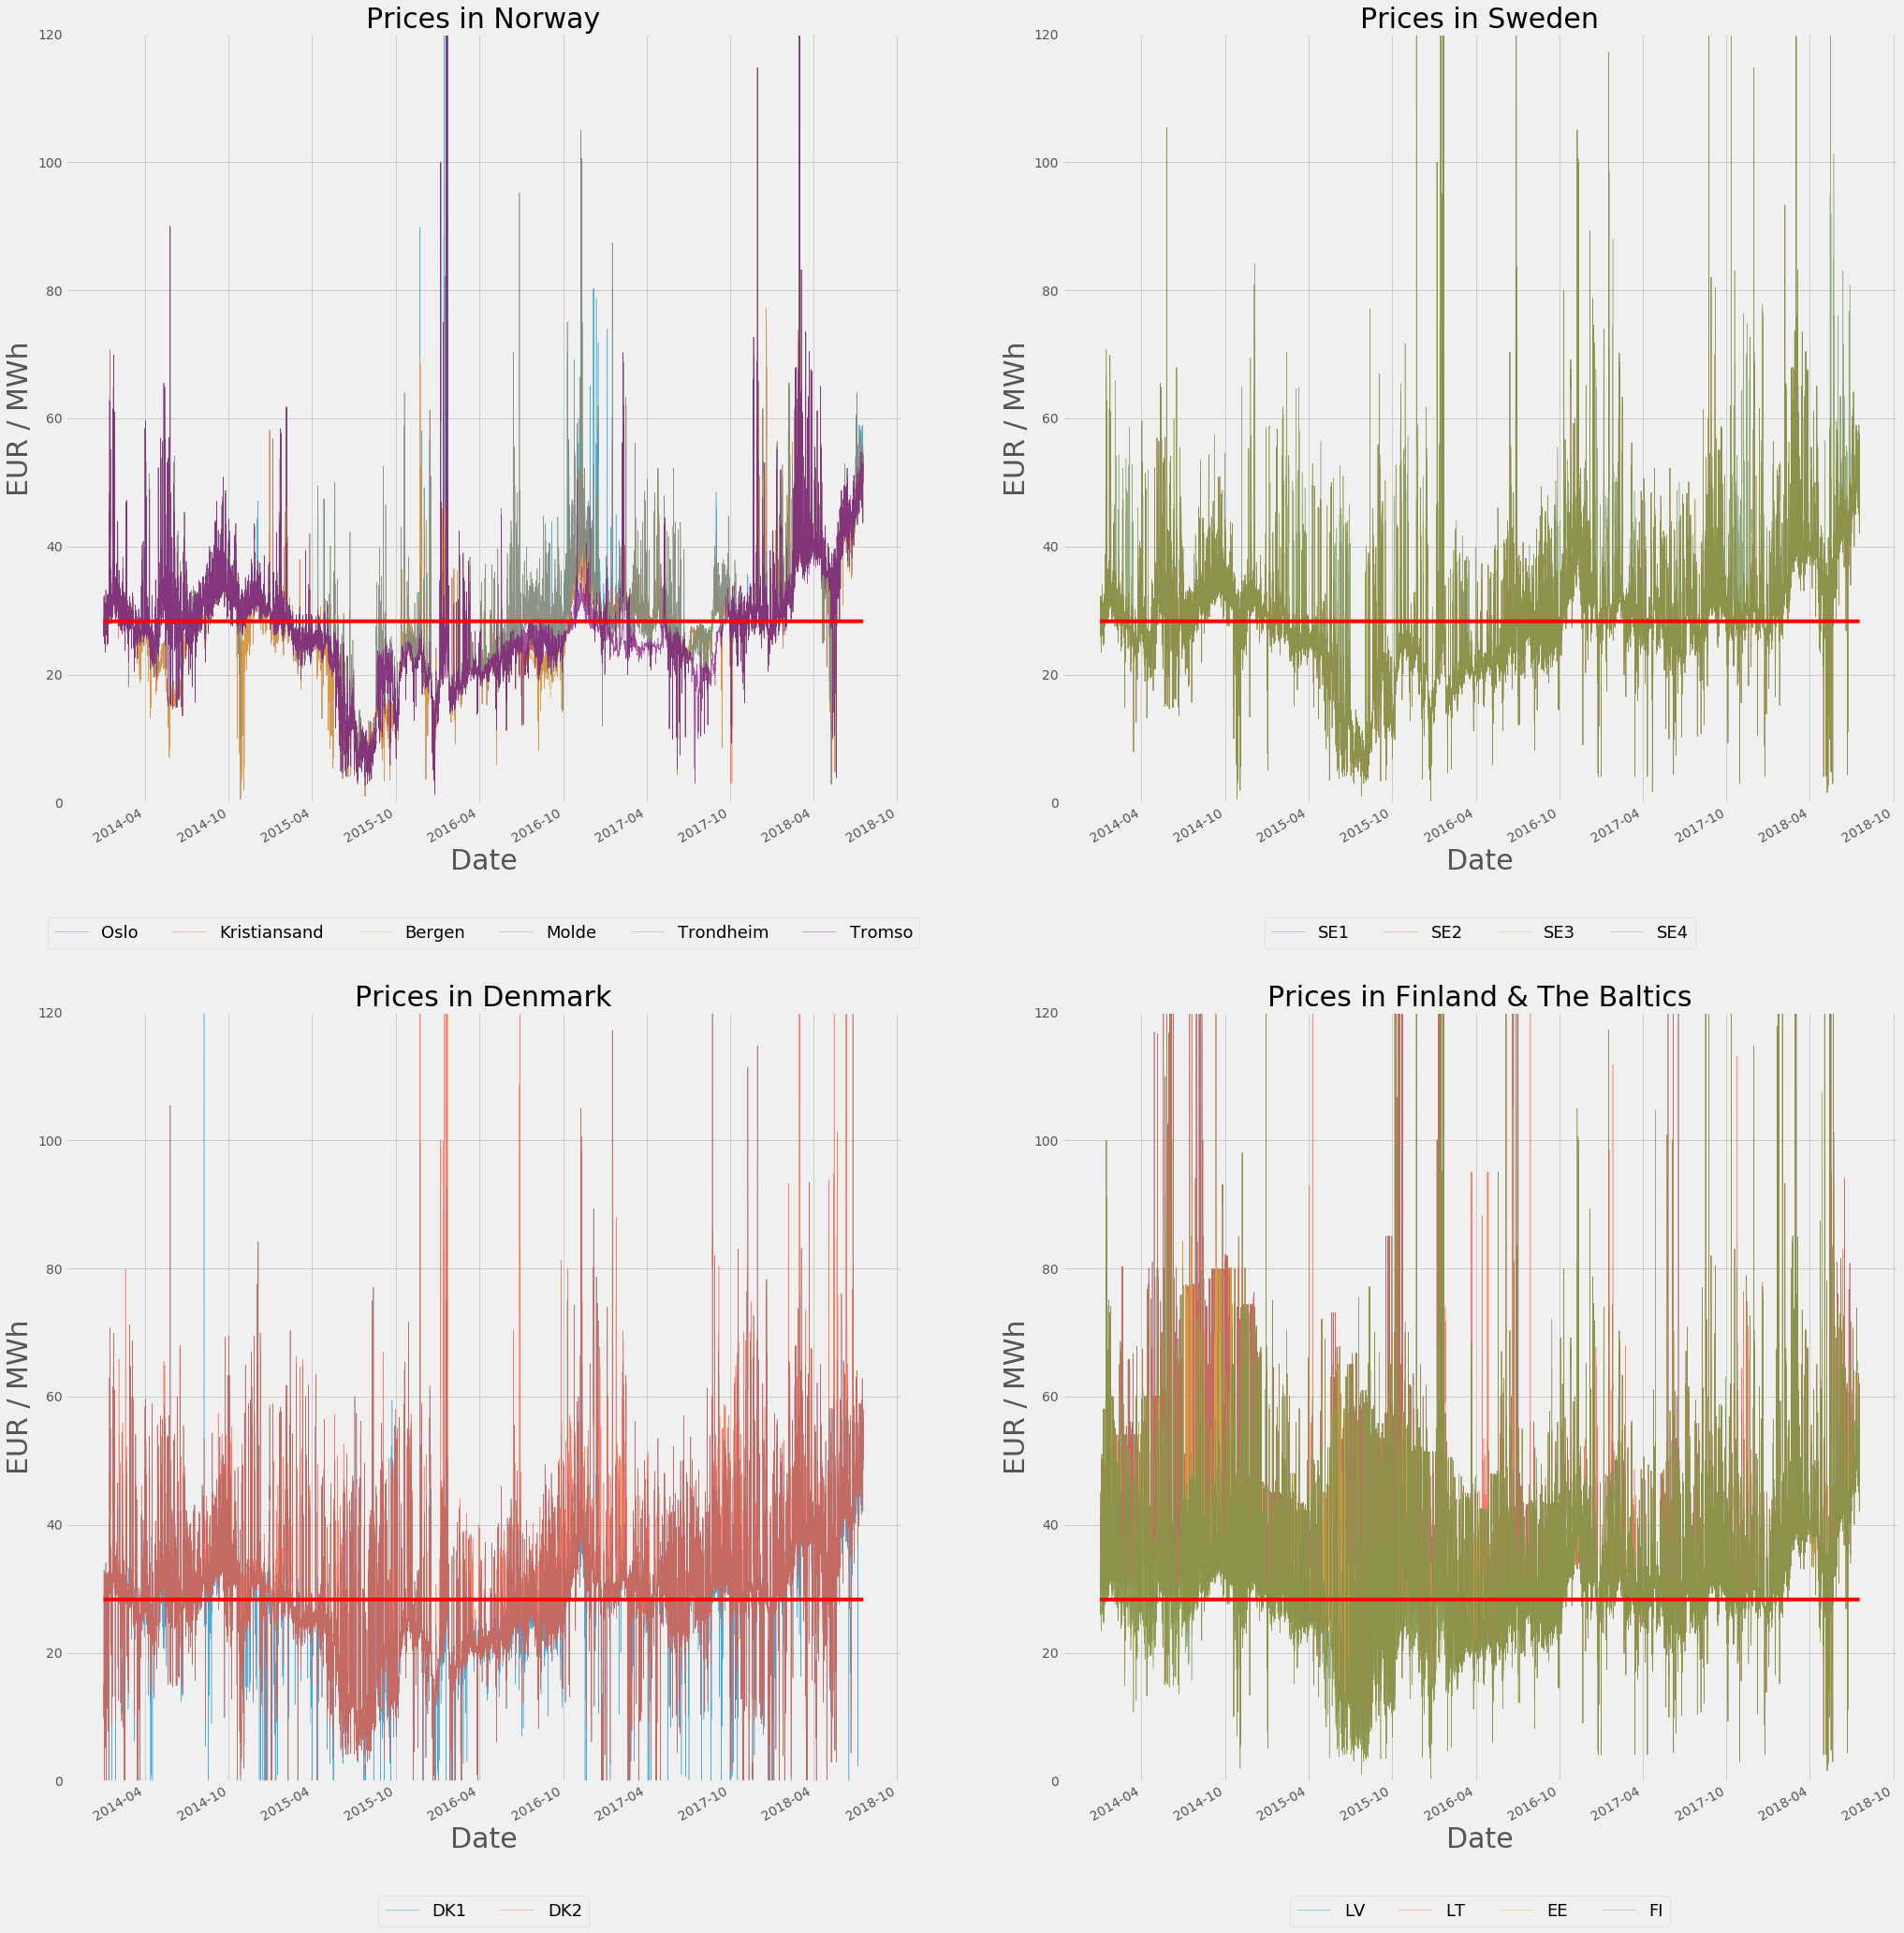

In [68]:
# Create lists of zones specific to each country. Baltics and Finland is grouped together as
# each country as one zone only
norway = ["Oslo", "Kristiansand", "Bergen", "Molde", "Trondheim", "Tromso"]
sweden = ["SE1", "SE2", "SE3", "SE4"]
denmark = ["DK1", "DK2"]
baltics_fin = ["LV", "LT", "EE", "FI"]
colors = ["aqua", "blue4", "brown1", "cadetblue1", "chartreuse3", "darkseagreen1"]


# Plot Norway
plt.subplot(2,2,1)

for zone in norway:
    ax = elspot_df[zone].plot(linewidth=0.5, alpha=0.7, figsize=(30,30))
    ax.set_ylim([0, 120]) # trying to avoid the large peaks
    
    
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=6, fontsize=18)
ax.set_ylabel("EUR / MWh", fontsize=30)
ax.set_xlabel("Date", fontsize=30)
elspot_df["SYS_mean"] = elspot_df["SYS"].mean()
ax.plot(elspot_df["SYS_mean"], color="r")
ax.set_title("Prices in Norway", fontsize=30)

# Plot Sweden
plt.subplot(2,2,2)

for zone in sweden:
    ax = elspot_df[zone].plot(linewidth=0.5, alpha=0.7, figsize=(30,30))
    ax.set_ylim([0, 120]) # trying to avoid the large peaks
    
    
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=6, fontsize=18)
ax.set_ylabel("EUR / MWh", fontsize=30)
ax.set_xlabel("Date", fontsize=30)
elspot_df["SYS_mean"] = elspot_df["SYS"].mean()
ax.plot(elspot_df["SYS_mean"], color="r")
ax.set_title("Prices in Sweden", fontsize=30)

# Plot Denmark
plt.subplot(2,2,3)

for zone in denmark:
    ax = elspot_df[zone].plot(linewidth=0.5, alpha=0.7, figsize=(30,30))
    ax.set_ylim([0, 120]) # trying to avoid the large peaks
    
    
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=6, fontsize=18)
ax.set_ylabel("EUR / MWh", fontsize=30)
ax.set_xlabel("Date", fontsize=30)
elspot_df["SYS_mean"] = elspot_df["SYS"].mean()
ax.plot(elspot_df["SYS_mean"], color="r")
ax.set_title("Prices in Denmark", fontsize=30)

# Plot Baltics & Finland 
plt.subplot(2,2,4)

for zone in baltics_fin:
    ax = elspot_df[zone].plot(linewidth=0.5, alpha=0.7, figsize=(30,30))
    ax.set_ylim([0, 120]) # trying to avoid the large peaks
    
    
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=6, fontsize=18)
ax.set_ylabel("EUR / MWh", fontsize=30)
ax.set_xlabel("Date", fontsize=30)
elspot_df["SYS_mean"] = elspot_df["SYS"].mean()
ax.plot(elspot_df["SYS_mean"], color="r")
ax.set_title("Prices in Finland & The Baltics", fontsize=30)


plt.tight_layout(pad=5)

While these graphs weren't especially pretty, it's easily seen that Norway and Sweden has very similar price levels, while in the Baltics prices are a lot more all over the place. The general price level in the Baltics also seems to be well above the system price mean (red line). 

In [83]:
elspot_df["Norway"] = elspot_df[norway].mean(axis=1)
elspot_df["Sweden"] = elspot_df[sweden].mean(axis=1)
elspot_df["Denmark"] = elspot_df[denmark].mean(axis=1)
elspot_df["Baltics_Finland"] = elspot_df[baltics_fin].mean(axis=1)

print("Mean in Norway: " + str(elspot_df["Norway"].mean()))
print("Mean in Sweden: " + str(elspot_df["Sweden"].mean()))
print("Mean in Denmark: " + str(elspot_df["Denmark"].mean()))
print("Mean in Baltics & Finland: " + str(elspot_df["Baltics_Finland"].mean()))



Mean in Norway: 27.82518403239712
Mean in Sweden: 29.86617228093066
Mean in Denmark: 29.846203970983282
Mean in Baltics & Finland: 37.84169450789504


# 3. Seasonal variations

Let's look at seasonal variations, and how the prices change from months to month and quarter to quarter.

In [86]:
# Extract years in different dataframes
elspot_df_2014 = elspot_df.loc["2014"]
elspot_df_2015 = elspot_df.loc["2015"]
elspot_df_2016 = elspot_df.loc["2016"]
elspot_df_2017 = elspot_df.loc["2017"]
elspot_df_2018 = elspot_df.loc["2018"]

# 

print(elspot_df[["Molde", "Trondheim"]].head(48))

                     Molde  Trondheim
Date                                 
2014-01-01 00:00:00  28.67      28.67
2014-01-01 01:00:00  28.08      28.08
2014-01-01 02:00:00  27.38      27.38
2014-01-01 03:00:00  26.21      26.21
2014-01-01 04:00:00  25.98      25.98
2014-01-01 05:00:00  26.38      26.38
2014-01-01 06:00:00  26.76      26.76
2014-01-01 07:00:00  27.14      27.14
2014-01-01 08:00:00  26.97      26.97
2014-01-01 09:00:00  26.54      26.54
2014-01-01 10:00:00  27.59      27.59
2014-01-01 11:00:00  28.43      28.43
2014-01-01 12:00:00  28.68      28.68
2014-01-01 13:00:00  28.82      28.82
2014-01-01 14:00:00  29.06      29.06
2014-01-01 15:00:00  29.39      29.39
2014-01-01 16:00:00  31.39      31.39
2014-01-01 17:00:00  32.09      32.09
2014-01-01 18:00:00  31.62      31.62
2014-01-01 19:00:00  30.63      30.63
2014-01-01 20:00:00  29.34      29.34
2014-01-01 21:00:00  29.19      29.19
2014-01-01 22:00:00  28.72      28.72
2014-01-01 23:00:00  27.84      27.84
2014-01-02 0